## This is demo for the assessment of one station's performance over the yearly available data

## Station Performance Analysis - Yearly Data Overview

This notebook demonstrates station-level performance analysis across the entire year of available data.

### Functions Used:

#### 1. `station_view_yearly(station_id, interval_minutes)`
Analyzes yearly station operations, separating incident-affected periods from normal operations.

**Parameters:**
- `station_id`: Station STANOX code (e.g., '12931')
- `interval_minutes`: Time interval for grouping data (e.g., 30, 60 minutes)

**Returns:**
- `incident_summary`: DataFrame with incident operations statistics per time period
- `normal_summary`: DataFrame with normal operations statistics per time period

**Output columns:**
- `time_period`: Time range (e.g., '08:00-09:00')
- `ontime_arrival_count`: Number of on-time arrivals
- `delayed_arrival_count`: Number of delayed arrivals
- `cancellation_count`: Number of cancellations
- `delay_minutes`: List of delay values for that period

---

#### 2. `plot_variable_relationships(station_id, all_data, time_window_minutes, num_platforms, figsize, max_delay_percentile)`
Creates scatter plots showing relationships between train flow and delays, separated by weekdays and weekends.

**Parameters:**
- `station_id`: Station STANOX code (e.g., '73000', '32000')
- `all_data`: Complete dataset (loaded via `load_processed_data()`)
- `time_window_minutes`: Time window for analysis (default: 60)
- `num_platforms`: Number of platforms at the station (default: 12)
- `figsize`: Figure size as tuple (default: (14, 10))
- `max_delay_percentile`: Percentile to trim extreme delays (default: 98)

**Analysis:**
- Flow calculated using ALL trains (incident and non-incident) per hour
- Mean delay calculated ONLY from delayed trains (delay > 0) per hour
- Each data point represents ONE SPECIFIC HOUR on one specific day
- Separate analysis for weekdays (Mon-Fri) and weekends (Sat-Sun)

**Returns:**
- Matplotlib figures showing flow vs delay relationships

In [10]:
# Import required libraries for station_view function
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt

# Ensure project root is in Python path
project_root = os.path.dirname(os.getcwd())  # Go up from demos to RDM_analysis
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Force reload of the module to get updated function signatures
import importlib
if 'outputs.utils' in sys.modules:
    import outputs.utils
    importlib.reload(outputs.utils)
    print("✅ Reloaded outputs.utils module")

if 'outputs.load_data' in sys.modules:
    import outputs.load_data
    importlib.reload(outputs.load_data)
    print("✅ Reloaded outputs.load_data module")

try:
    from outputs.load_data import load_processed_data
    from outputs.utils import station_view_yearly, plot_variable_relationships
    print("✅ Libraries imported successfully for station_view analysis")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Make sure you're running from the RDM_analysis directory")
except Exception as e:
    print(f"❌ Error: {e}")

station_view_yearly function ready!
plot_arrival_hour_distributions_violin function ready!
plot_variable_relationships function ready!
✅ Reloaded outputs.utils module
✅ Reloaded outputs.load_data module
✅ Libraries imported successfully for station_view analysis


In [2]:
from outputs.load_data import load_processed_data

all_data = load_processed_data()

✅ Loaded 10,450,237 rows from 2599 files. Skipped 0.


In [8]:
# Test the updated yearly analysis function
incident_summary, normal_summary = station_view_yearly(
    station_id='12931', 
    interval_minutes=60
)

# Display the results
print(" YEARLY STATION ANALYSIS RESULTS:")
print("=" * 80)

if incident_summary is not None and len(incident_summary) > 0:
    print("\n🔴 INCIDENT OPERATIONS:")
    print("-" * 40)
    print(incident_summary.to_string(index=False))
    print(f"Total incident periods: {len(incident_summary)}")
    
if normal_summary is not None and len(normal_summary) > 0:
    print("\n🟢 NORMAL OPERATIONS:")
    print("-" * 40)
    print(normal_summary.to_string(index=False))
    print(f"Total normal periods: {len(normal_summary)}")

print("=" * 80)

Loaded 7549 records from MO.parquet
Loaded 7474 records from TU.parquet
Loaded 7300 records from WE.parquet
Loaded 7247 records from TH.parquet
Loaded 6941 records from FR.parquet
Loaded 4979 records from SA.parquet
Loaded 3785 records from SU.parquet
Total combined records: 45275
Incident-related records: 2887
Normal operations records: 4358
 YEARLY STATION ANALYSIS RESULTS:

🔴 INCIDENT OPERATIONS:
----------------------------------------
time_period  ontime_arrival_count  delayed_arrival_count  cancellation_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Testing variable relationships function...
🚀 CREATING TEMPORAL FLOW ANALYSIS FOR STATION 73000
Loaded 84250 total records for station 73000
Using 81464 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 67 unique dates from 2024-02-05 to 2024-12-30
  TU: 62 unique dates from 2024-02-06 to 2024-12-31
  WE: 56 unique dates from 2024-02-07 to 2025-01-01
  TH: 56 unique dates from 2024-02-08 to 2025-01-02
  FR: 61 unique dates from 2024-02-09 to 2025-01-04
  SA: 62 unique dates from 2024-02-10 to 2025-01-04
  SU: 67 unique dates from 2024-02-04 to 2024-12-23
Found date mappings for 7 day codes
  MO: 67 unique dates from 2024-02-05 to 2024-12-30
  TU: 62 unique dates from 2024-02-06 to 2024-12-31
  WE: 56 unique dates from 2024-02-07 to 2025-01-01
  TH: 56 unique dates from 2024-02-08 to 2025-01-02
  FR: 61 unique dates from 2024-02-09 to 2025-01-04
  SA: 62 unique dates from 2024

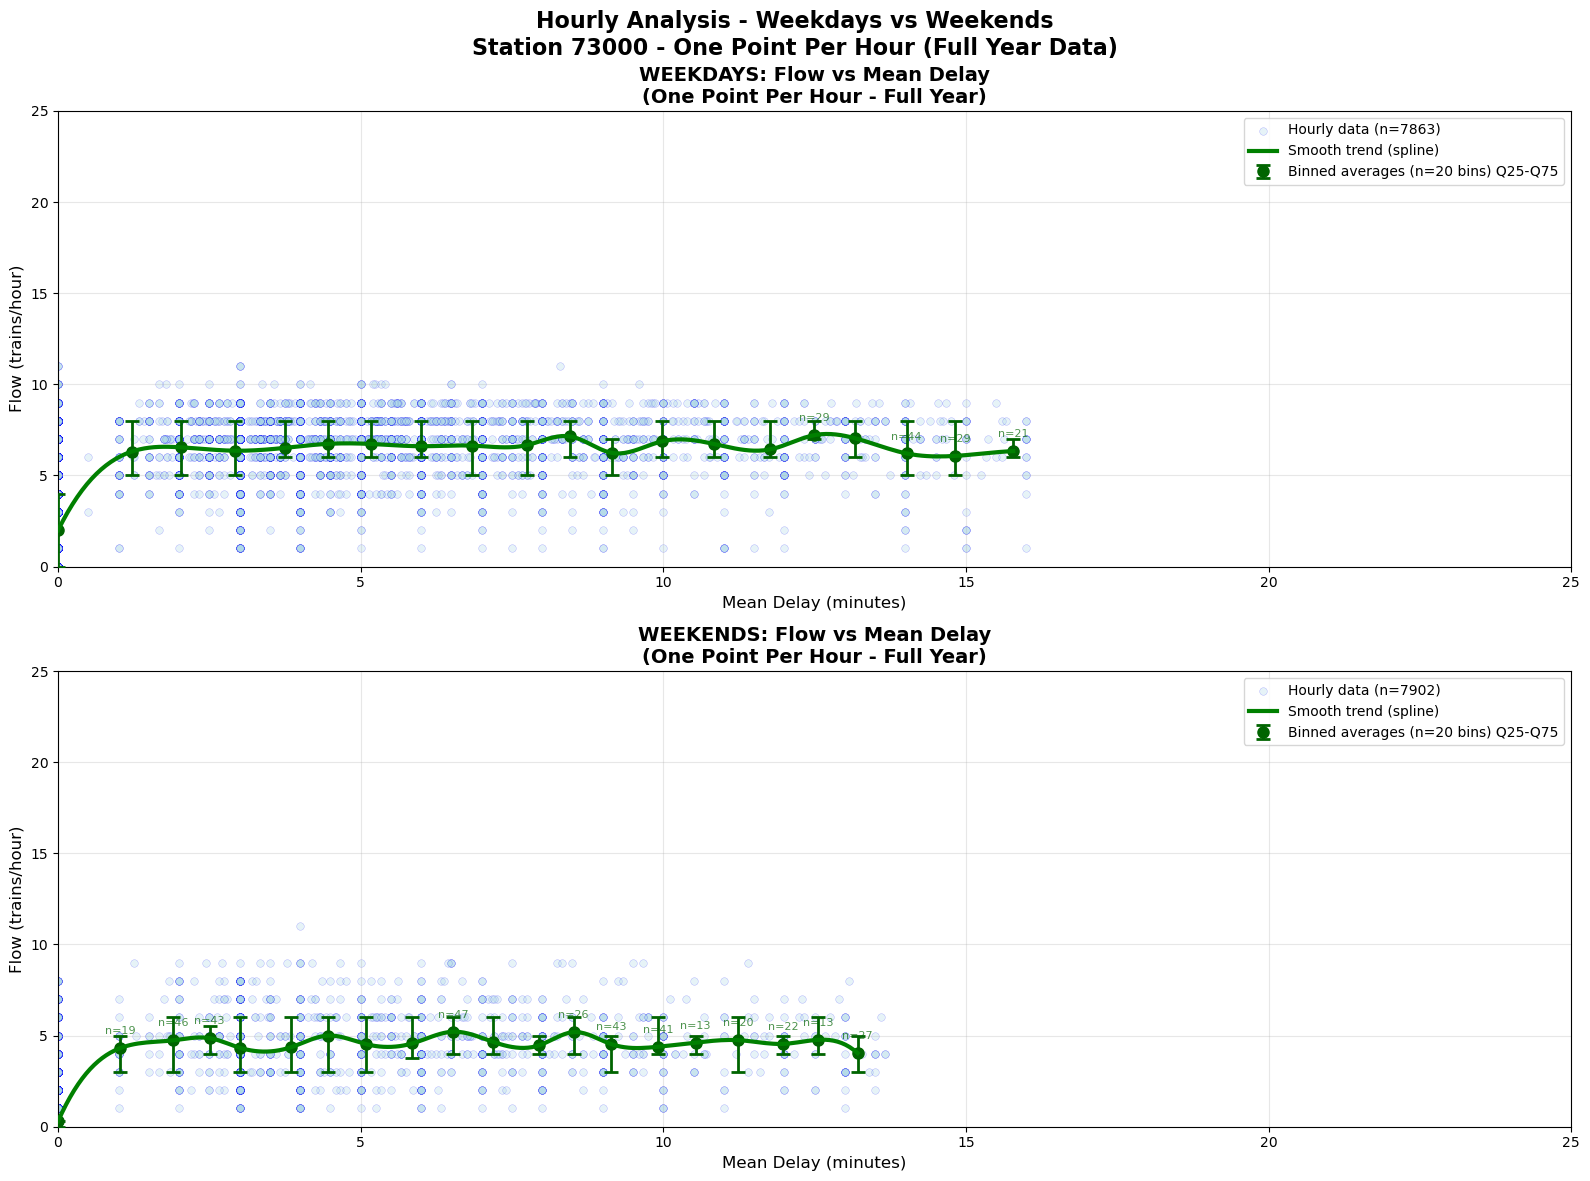

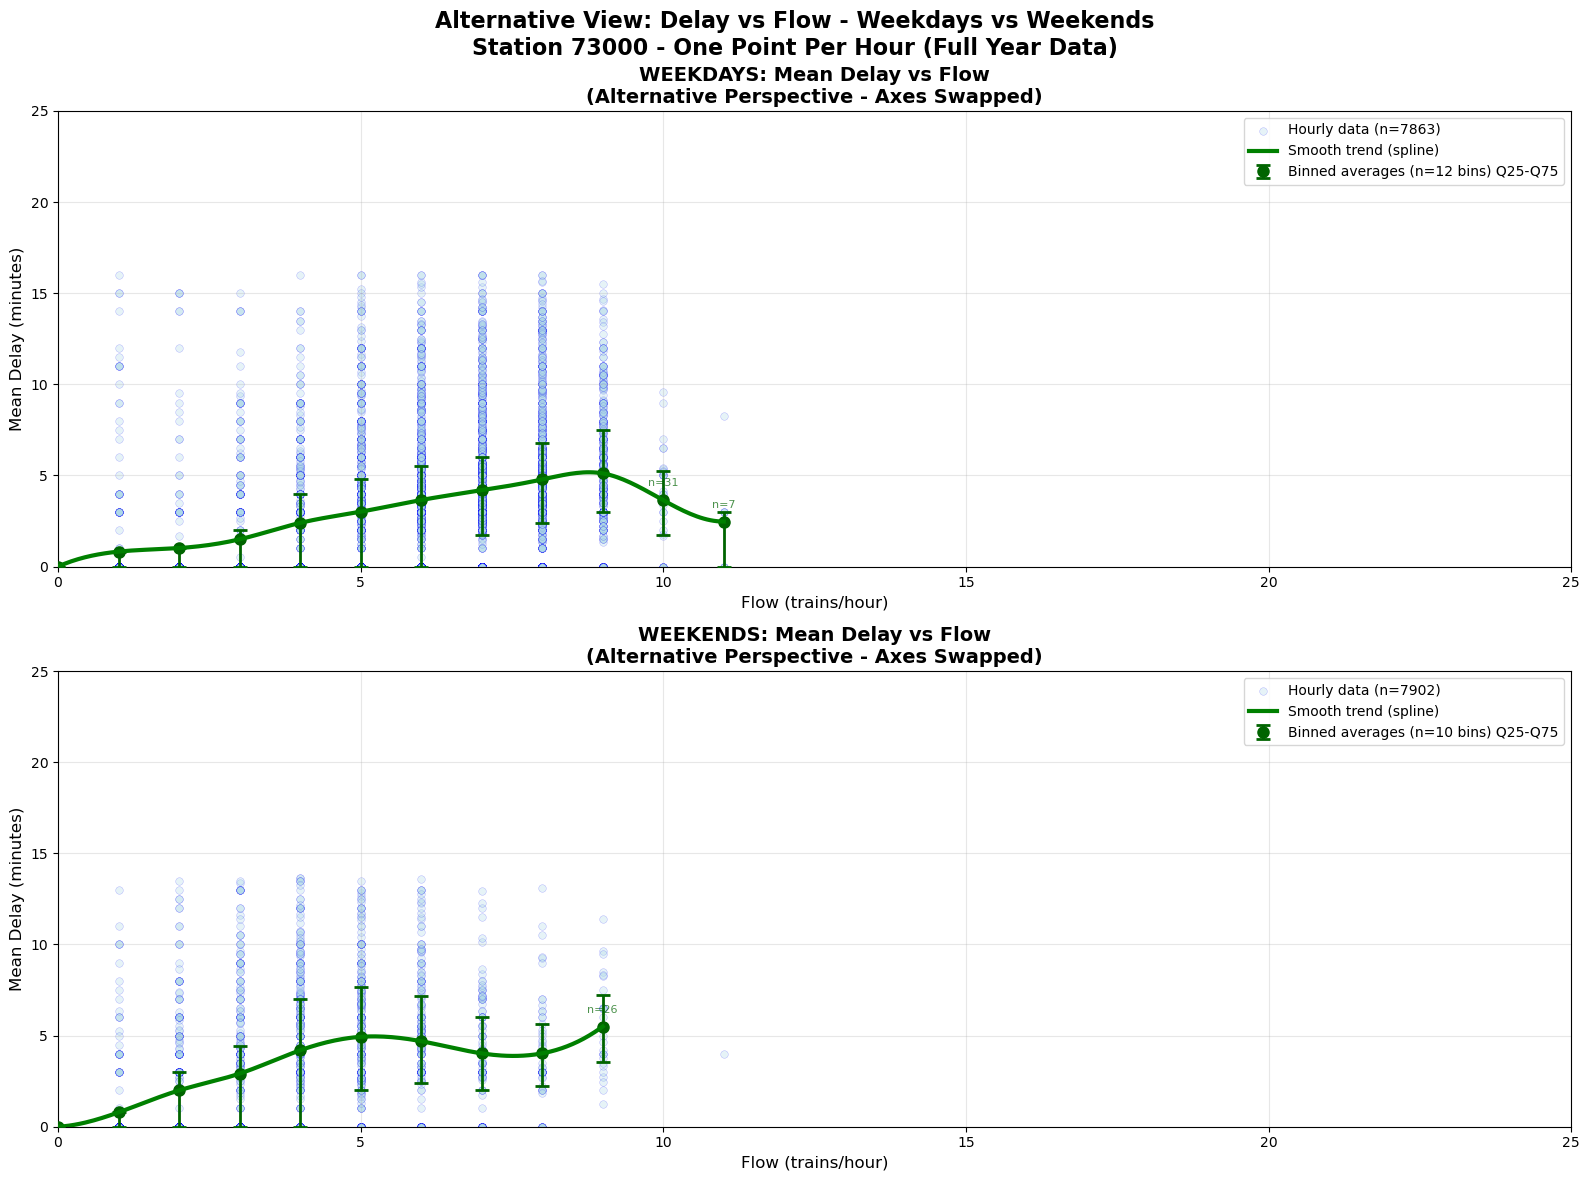

In [11]:
# Test the variable relationships function
print("Testing variable relationships function...")
relationships_results = plot_variable_relationships(
    station_id='73000',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=11,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()

Testing variable relationships function...
🚀 CREATING TEMPORAL FLOW ANALYSIS FOR STATION 32000
Loaded 217738 total records for station 32000
Using 214264 arrived trains (both incident and non-incident) for flow calculation
Creating datetime timestamps from EVENT_DATETIME...
Found date mappings for 7 day codes
  MO: 74 unique dates from 2024-02-05 to 2024-12-31
  TU: 72 unique dates from 2024-02-06 to 2025-01-01
  WE: 72 unique dates from 2024-02-07 to 2025-01-01
  TH: 73 unique dates from 2024-02-08 to 2025-01-03
  FR: 79 unique dates from 2024-02-09 to 2025-01-04
  SA: 66 unique dates from 2024-02-10 to 2025-01-04
  SU: 62 unique dates from 2024-02-04 to 2024-12-29
Found date mappings for 7 day codes
  MO: 74 unique dates from 2024-02-05 to 2024-12-31
  TU: 72 unique dates from 2024-02-06 to 2025-01-01
  WE: 72 unique dates from 2024-02-07 to 2025-01-01
  TH: 73 unique dates from 2024-02-08 to 2025-01-03
  FR: 79 unique dates from 2024-02-09 to 2025-01-04
  SA: 66 unique dates from 20

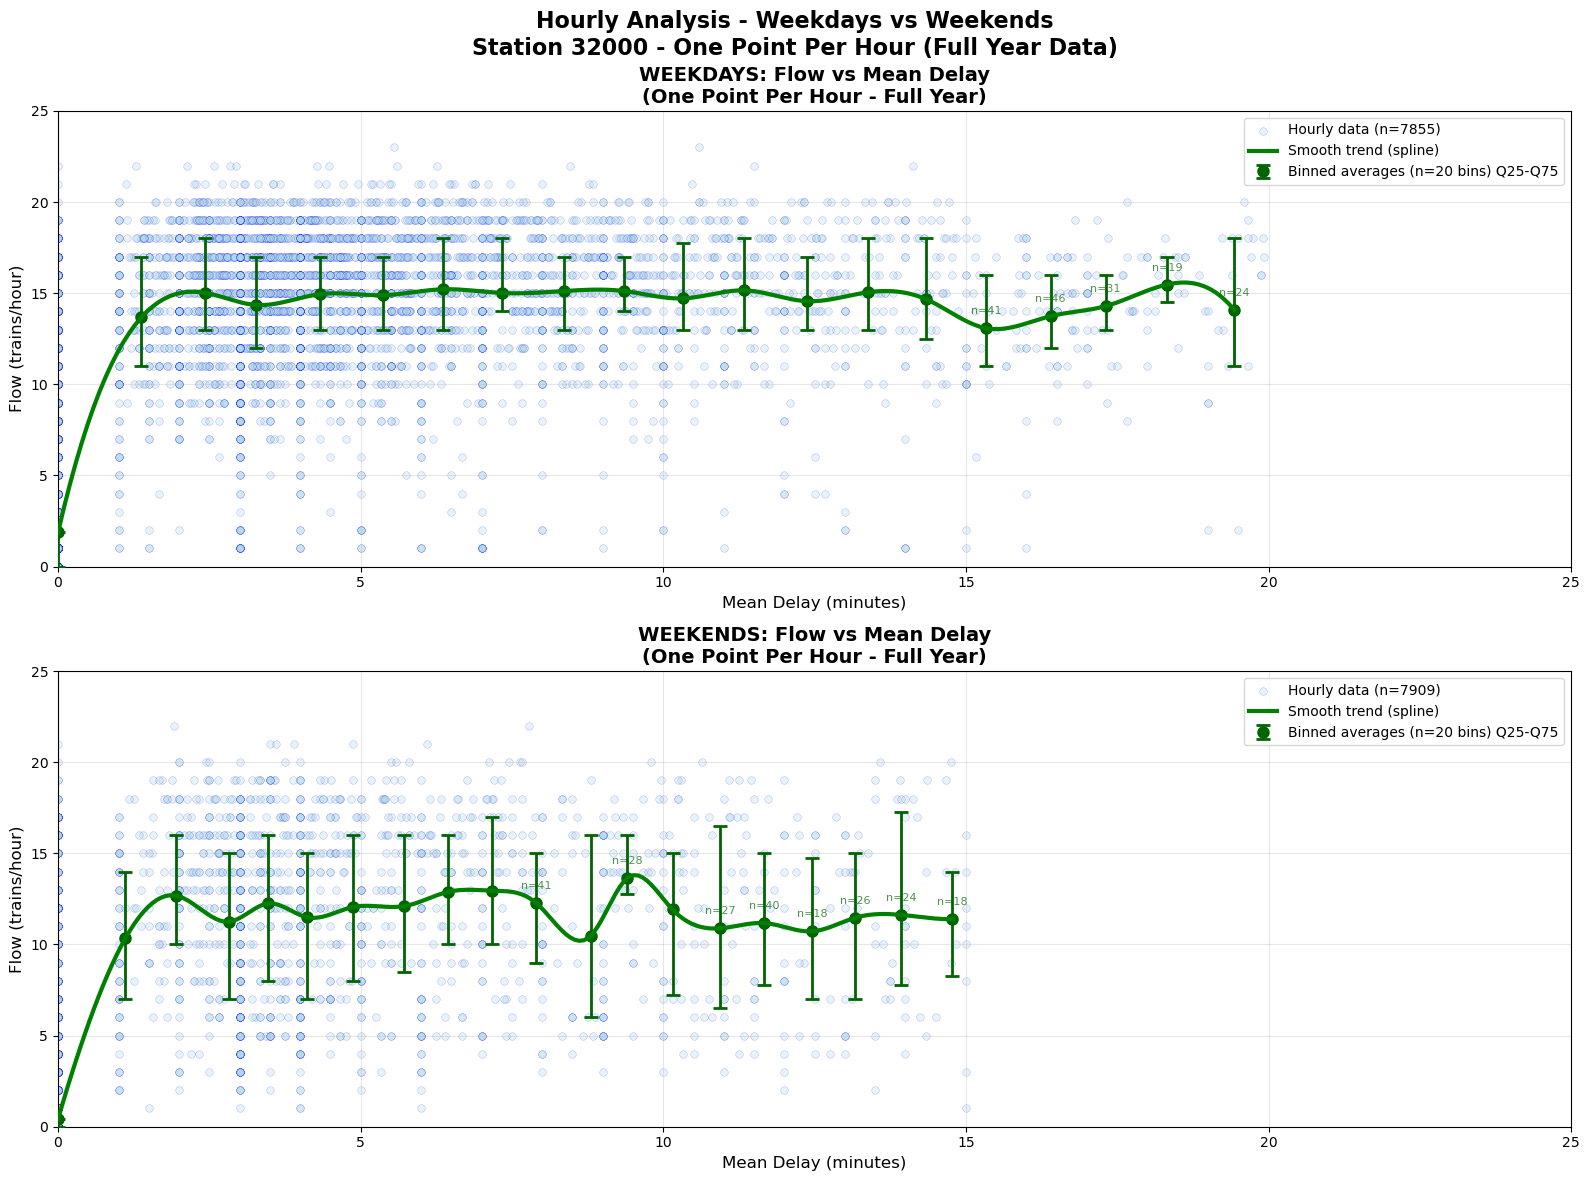

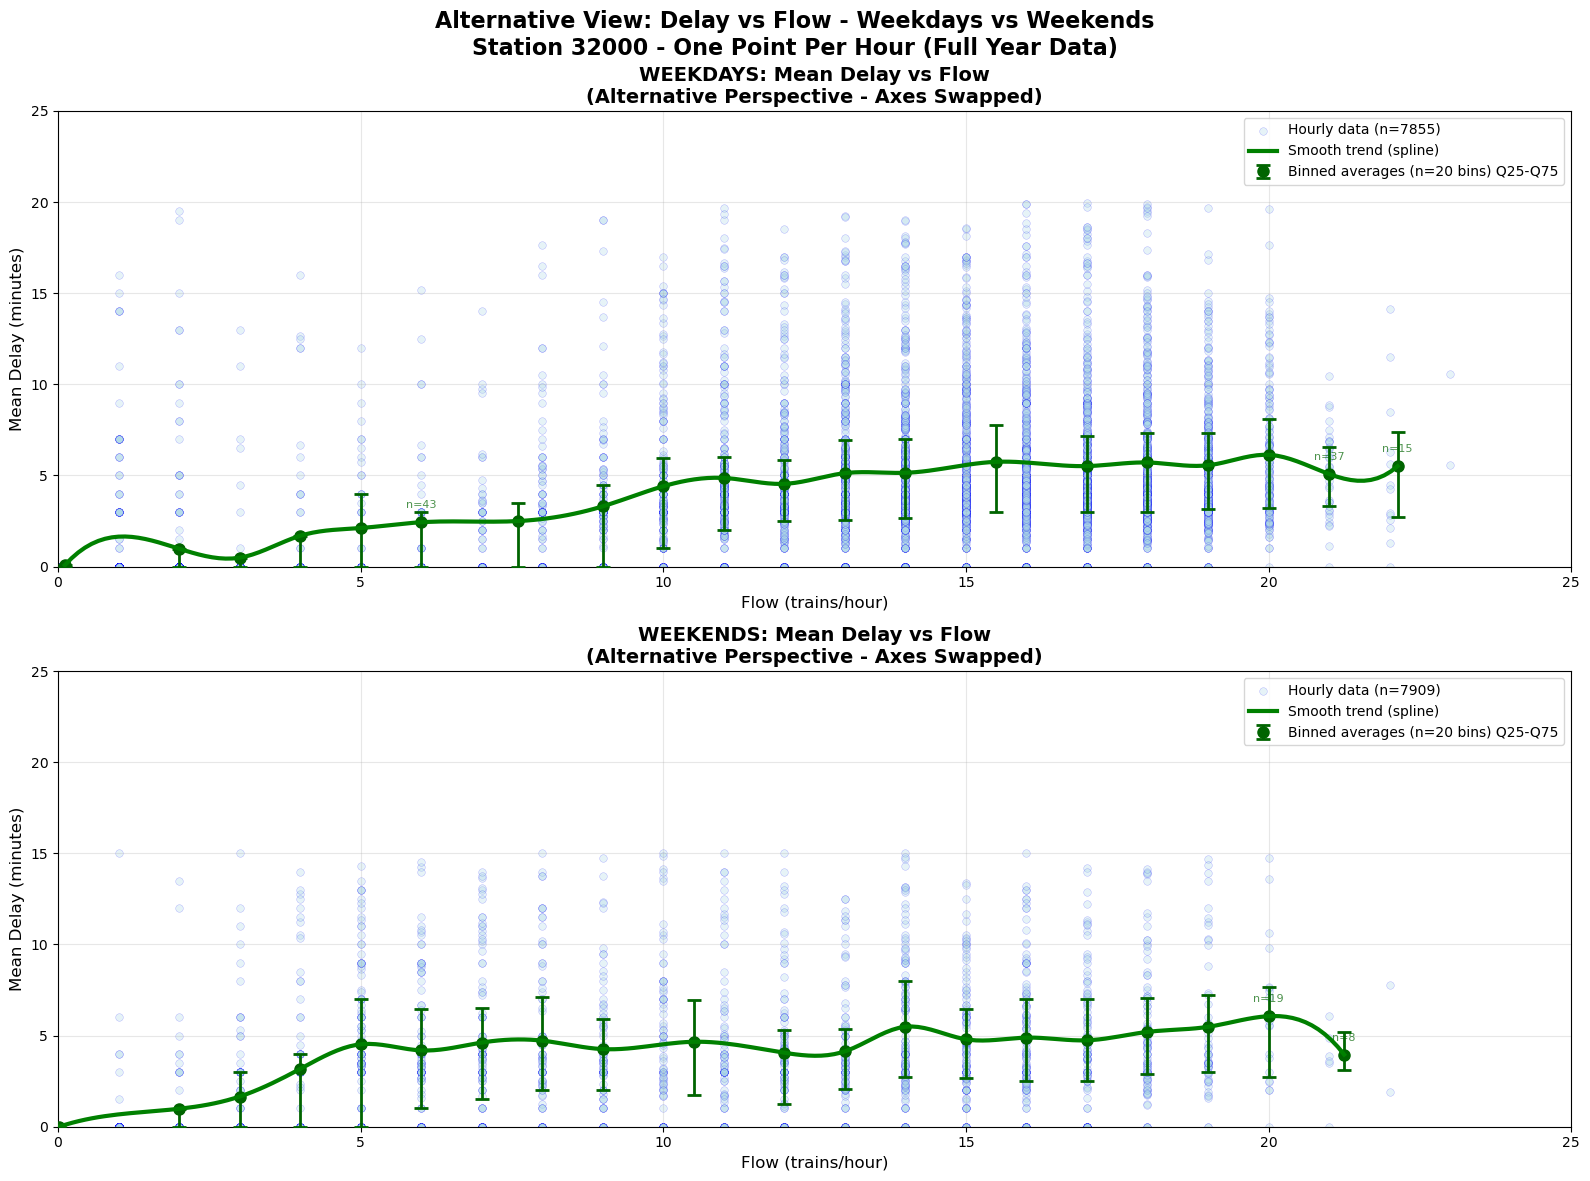

In [12]:
# Test the variable relationships function
print("Testing variable relationships function...")
relationships_results = plot_variable_relationships(
    station_id='32000',
    all_data=all_data,
    time_window_minutes=60,
    num_platforms=11,
    figsize=(16, 12),
    max_delay_percentile=98
)
plt.show()